# Cement manufacturing - concrete strength prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
csv = pd.read_csv('concrete.csv')
df = pd.DataFrame(csv)

In [3]:
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [4]:
df.dtypes

cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
strength        float64
dtype: object

## Age check
It is important to check the ages of the tests, because the usual age for comparing strength is at 28-days at most cases.

In [5]:
df['age'].value_counts()

age
28     425
3      134
7      126
56      91
14      62
90      54
100     52
180     26
91      22
365     14
270     13
360      6
120      3
1        2
Name: count, dtype: int64

## Exploring the distribution of the strengths

<Axes: xlabel='strength', ylabel='Count'>

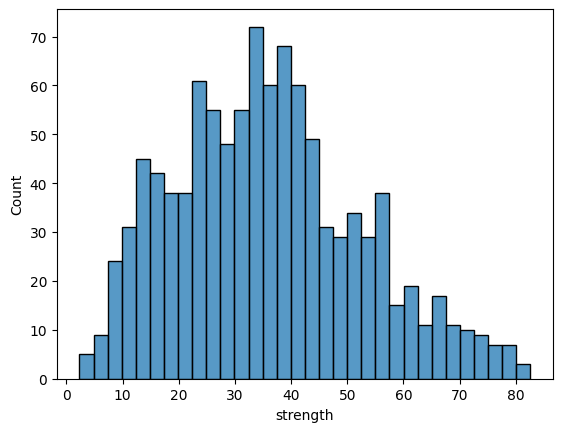

In [6]:
sns.histplot(data=df, x="strength", binwidth=2.5)

## Joining the binders
We need to see the 3 kind of binders combined as well to see the w/c ratio of the mixtures.

In [7]:
df["binder"] = df["cement"] + df["slag"] + df["ash"]

<Axes: xlabel='binder', ylabel='Count'>

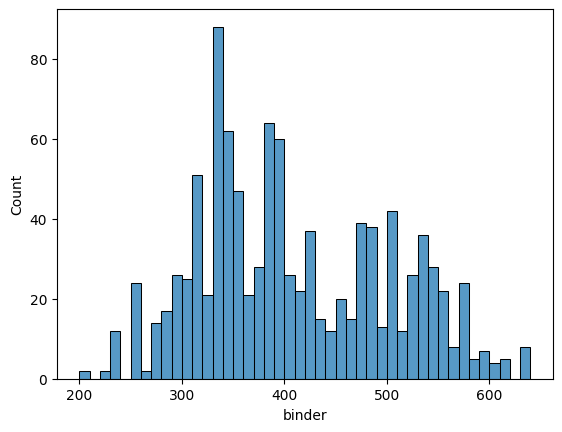

In [8]:
sns.histplot(data=df, x="binder", binwidth=10)

In [9]:
df["w/c"] = np.round((df["water"] + df["superplastic"]) / df["binder"], 3)

<Axes: xlabel='w/c', ylabel='Count'>

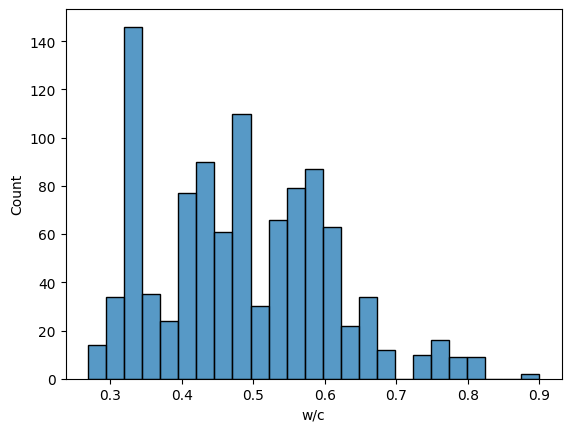

In [10]:
sns.histplot(data=df, x="w/c", binwidth=0.025)

## Filtering for results at 28-days
To see the present correlation between the w/c ratio and strength, we filter for the results only at 28-days.

In [11]:
df_28 = df[df["age"] == 28]
df_28.shape

(425, 11)

<Axes: xlabel='w/c', ylabel='strength'>

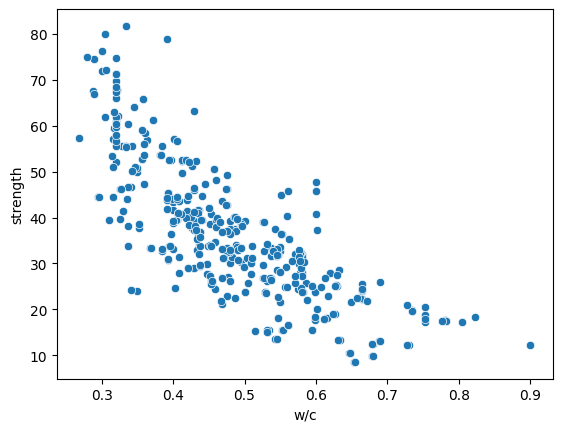

In [12]:
sns.scatterplot(data=df_28, x="w/c", y="strength")

## Examining the ratio of the aggregates

In [13]:
df["agg"] = df["coarseagg"] + df["fineagg"]
df["fineagg_ratio"] = np.round(df["fineagg"] / df["agg"], 3)
df["coarseagg_ratio"] = np.round(df["coarseagg"] / df["agg"], 3)

In [14]:
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,binder,w/c,agg,fineagg_ratio,coarseagg_ratio
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89,353.3,0.576,1720.3,0.435,0.565
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51,335.4,0.504,1877.0,0.424,0.576
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22,345.7,0.558,1818.1,0.474,0.526
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85,380.0,0.600,1602.0,0.418,0.582
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29,338.2,0.598,1744.1,0.399,0.601


In [15]:
df_filtered = df[["age", "strength", "w/c", "binder", "agg", "fineagg_ratio"]]

In [16]:
df_filtered_28 = df_filtered[df_filtered["age"] == 28]
df_filtered_28.head()

,age,strength,w/c,binder,agg,fineagg_ratio
0,28,29.89,0.576,353.3,1720.3,0.435
2,28,29.22,0.558,345.7,1818.1,0.474
3,28,45.85,0.600,380.0,1602.0,0.418
4,28,18.29,0.598,338.2,1744.1,0.399
8,28,21.65,0.649,296.0,1850.0,0.414


In [17]:
df_filtered_28_wo_age = df_filtered_28.drop(columns=["age"])

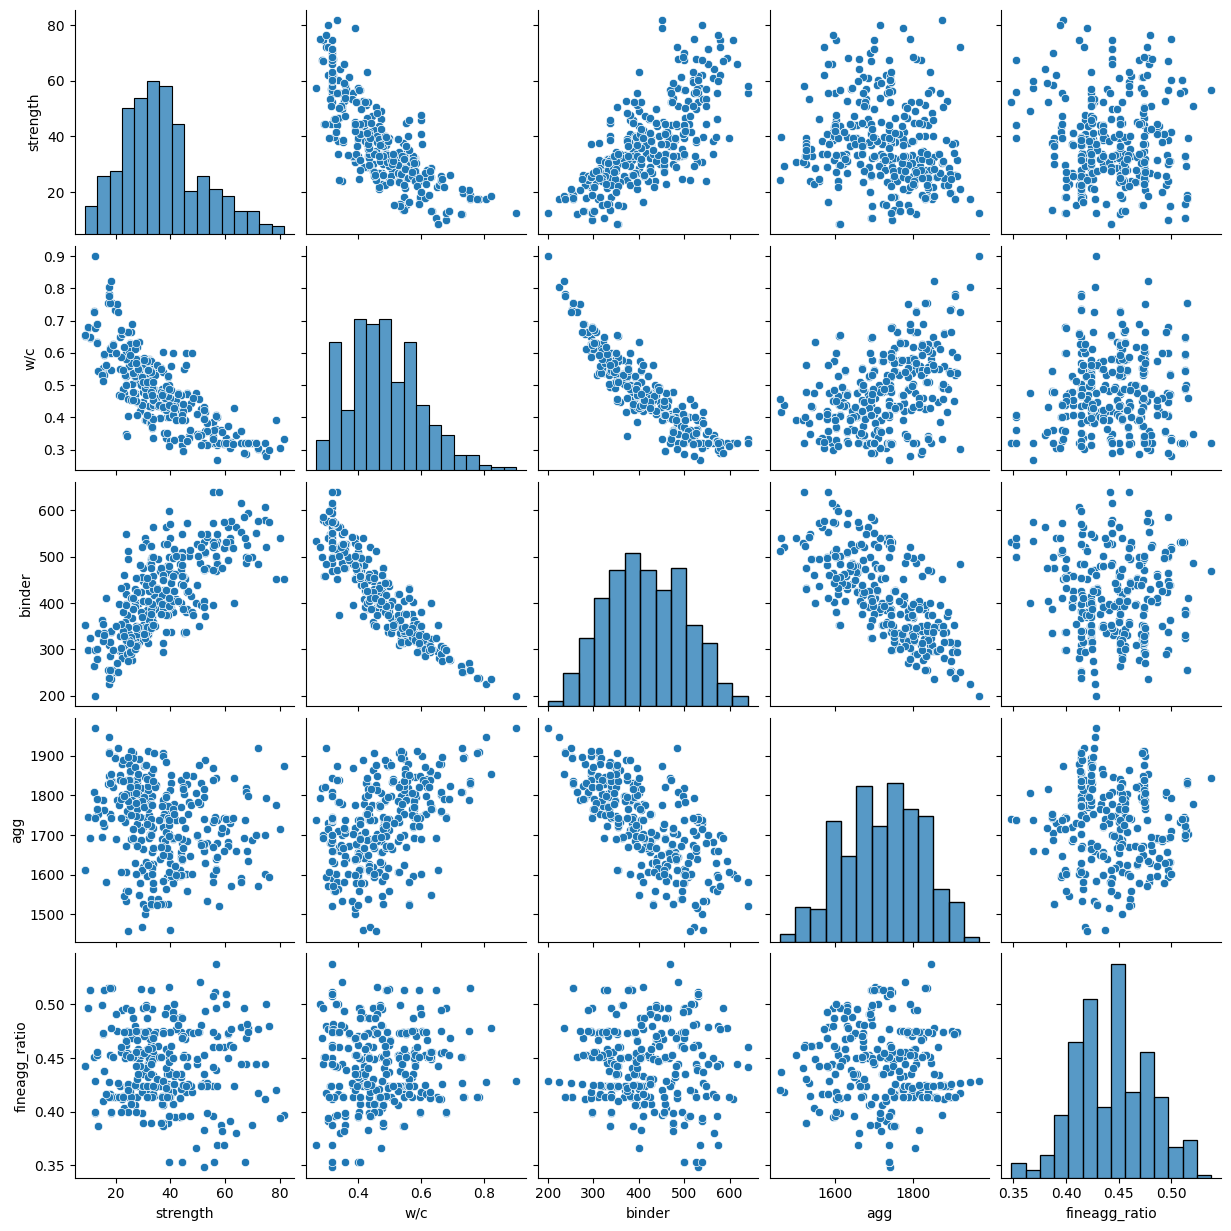

In [18]:
sns.pairplot(data=df_filtered_28_wo_age)

## Checking the distribution of the dosages of supplementary cementitious materials

In [19]:
df_28 = df[df["age"] == 28]

In [20]:
scm_means = [df_28[i].mean() for i in ["binder", "cement", "slag", "ash"]]

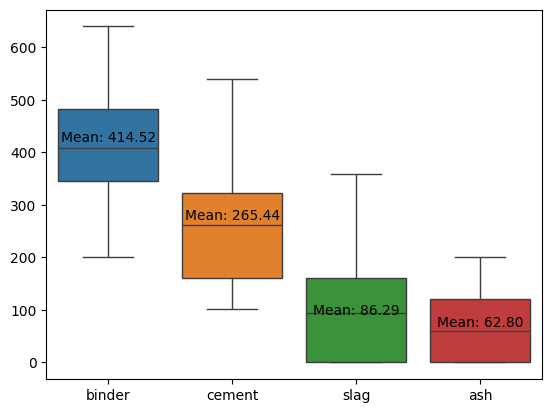

In [21]:
sns.boxplot(data=df_28[["binder", "cement", "slag", "ash"]])

for i, mean in enumerate(scm_means):
    plt.text(i, mean, f'Mean: {mean:.2f}', horizontalalignment='center', verticalalignment='bottom')

## Preparing dataframe to predictive model

In [22]:
df_28.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,binder,w/c,agg,fineagg_ratio,coarseagg_ratio
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89,353.3,0.576,1720.3,0.435,0.565
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22,345.7,0.558,1818.1,0.474,0.526
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85,380.0,0.600,1602.0,0.418,0.582
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29,338.2,0.598,1744.1,0.399,0.601
8,296.0,0.0,0.0,192.0,0.0,1085.0,765.0,28,21.65,296.0,0.649,1850.0,0.414,0.586


In [23]:
df_28_pm = df_28.drop(columns=["water", "superplastic", "coarseagg", "fineagg", "age", "binder", "agg", "coarseagg_ratio"])
df_28_pm

,cement,slag,ash,strength,w/c,fineagg_ratio
0,141.3,212.0,0.0,29.89,0.576,0.435
2,250.0,0.0,95.7,29.22,0.558,0.474
3,266.0,114.0,0.0,45.85,0.600,0.418
4,154.8,183.4,0.0,18.29,0.598,0.399
8,296.0,0.0,0.0,21.65,0.649,0.414
...,...,...,...,...,...,...
1016,140.0,133.0,103.0,36.44,0.551,0.451
1018,147.0,115.0,89.0,19.99,0.601,0.491
1022,144.8,0.0,133.6,13.20,0.689,0.453
1025,135.0,0.0,166.0,13.29,0.631,0.456


# Starting training predictive model

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor

In [25]:
X = df_28_pm.drop("strength", axis=1)
y = df_28_pm['strength']

In [26]:
feature_train, feature_test, target_train, target_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [27]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(feature_train, target_train)
y_pred = model.predict(feature_test)

## Calculating cross-validation score

In [28]:
from sklearn.model_selection import cross_val_score
cvs = cross_val_score(model, X, y, cv=5)
cvs

array([0.76934445, 0.81434743, 0.82515921, 0.85735957, 0.84891783])

In [29]:
cvs.mean()

0.8230256972417168

## Calculating mean squared error

In [30]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(target_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 42.271251649529404


## Calculating R-Squared score

In [31]:
from sklearn.metrics import r2_score

r2 = r2_score(target_test, y_pred)
print('R-squared:', r2)

R-squared: 0.8004341804194778


## Calculating Mean Absolute Percentage Error

In [32]:
from sklearn.metrics import mean_absolute_percentage_error

mape = mean_absolute_percentage_error(target_test, y_pred)
print('Mean Absolute Percentage Error:', mape)

Mean Absolute Percentage Error: 0.1132800898990517


## Examining the effects of the features with Shapley

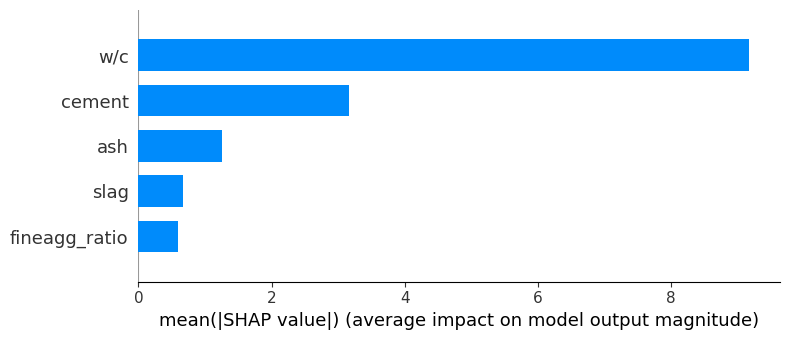

In [33]:
import shap

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(feature_test)
shap.summary_plot(shap_values, feature_test, plot_type="bar")

In [34]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0], feature_test.iloc[0])

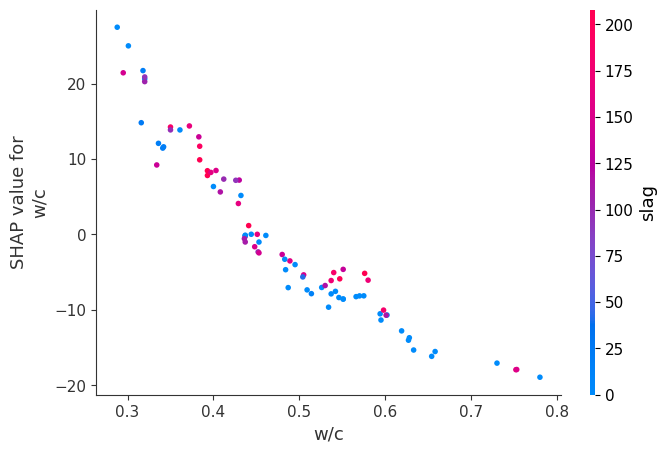

In [35]:
shap.dependence_plot("w/c", shap_values, feature_test)

# Trying to fit the strengh-w/c correlation with a polynomial curve

In [36]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

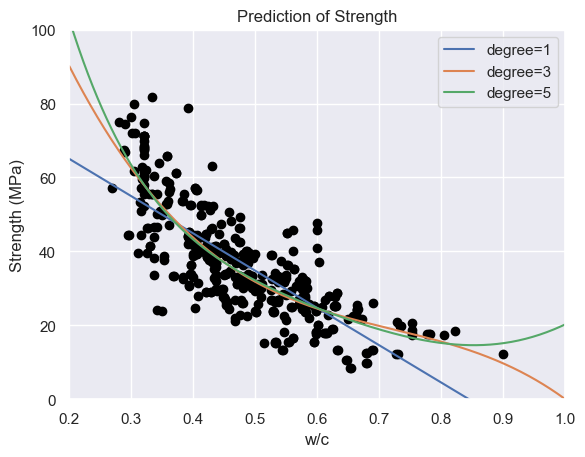

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # plot formatting

X_test = np.linspace(0.2, 1.0, 425)[:, None]
X_simple = X["w/c"].values.reshape(-1, 1)


plt.scatter(X_simple, y, color='black')

plt.xlabel('w/c')
plt.ylabel('Strength (MPa)')
plt.title('Prediction of Strength')

axis = plt.axis()
for degree in [1, 3, 5]:
    y_test = PolynomialRegression(degree).fit(X_simple, y).predict(X_test)
    plt.plot(X_test, y_test, label='degree={0}'.format(degree))
plt.xlim(0.2, 1)
plt.ylim(0, 100)
plt.legend(loc='best');

## Predicting for a given composition

In [38]:
new_data = {
    'cement': [200],
    'slag': [120],
    'ash': [40],
    'w/c': [0.46],
    'fineagg_ratio': [0.45],
}

new_df = pd.DataFrame(new_data)
predicted_strength = model.predict(new_df)
print("Predicted strength:", round(predicted_strength[0], 2), "MPa.")

Predicted strength: 38.47 MPa.


# Check early strength samples

### Check if there are matches with the 28 days' rows

In [39]:
filtered_rows = df[df['age'].isin([3, 7, 14])]
age_28_rows = df[df['age'] == 28]
exists = any([(age_28_rows[['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg', 'fineagg']] 
               == row[['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg', 'fineagg']]).all(axis=1).any() 
              for _, row in filtered_rows.iterrows()])

print("Exists:", exists)

Exists: True


## Finding those matches

In [40]:
matching_indices = []
index_pairs = []

for idx, row in filtered_rows.iterrows():
    match_28_row = age_28_rows[(age_28_rows[['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg', 'fineagg']] 
                                == row[['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg', 'fineagg']]).all(axis=1)]
    if not match_28_row.empty:
        matching_indices.append((idx, match_28_row.index[0]))

if matching_indices:
    for pair in matching_indices:
        index_pairs.append(pair)

print(f"Number of pairs: {len(index_pairs)}\n")
print(f"Matching Row Indices:\n{index_pairs}")

Number of pairs: 313

Matching Row Indices:
[(1, 771), (6, 200), (11, 561), (12, 113), (13, 16), (18, 651), (20, 700), (21, 564), (22, 186), (36, 242), (37, 964), (38, 579), (40, 344), (46, 343), (49, 433), (55, 714), (57, 281), (58, 656), (60, 35), (61, 1001), (69, 128), (70, 819), (72, 373), (75, 725), (76, 549), (77, 814), (78, 147), (84, 748), (87, 371), (88, 96), (89, 428), (90, 987), (91, 96), (92, 815), (94, 409), (97, 396), (104, 254), (107, 195), (111, 290), (114, 840), (115, 729), (119, 507), (120, 160), (127, 444), (134, 30), (138, 485), (141, 1009), (143, 936), (146, 725), (150, 974), (153, 791), (162, 460), (165, 464), (172, 597), (176, 180), (177, 273), (179, 8), (183, 417), (184, 986), (185, 716), (187, 333), (196, 970), (202, 934), (211, 911), (213, 694), (217, 852), (218, 113), (219, 130), (221, 181), (223, 282), (230, 736), (231, 734), (234, 452), (235, 748), (236, 1009), (237, 768), (246, 205), (255, 591), (258, 752), (259, 699), (261, 233), (265, 498), (268, 485), (

In [41]:
for element in index_pairs[:1]:
    print(df.iloc[element[0]])
    print(df.iloc[element[1]])

cement              168.900
slag                 42.200
ash                 124.300
water               158.300
superplastic         10.800
coarseagg          1080.800
fineagg             796.200
age                  14.000
strength             23.510
binder              335.400
w/c                   0.504
agg                1877.000
fineagg_ratio         0.424
coarseagg_ratio       0.576
Name: 1, dtype: float64
cement              168.900
slag                 42.200
ash                 124.300
water               158.300
superplastic         10.800
coarseagg          1080.800
fineagg             796.200
age                  28.000
strength             31.120
binder              335.400
w/c                   0.504
agg                1877.000
fineagg_ratio         0.424
coarseagg_ratio       0.576
Name: 771, dtype: float64


## Making a new dataframe out of them

In [42]:
columns = ['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg', 'fineagg', 
           'early_age', 'early_strength', '28d_age', '28d_strength']

In [43]:
new_df = pd.DataFrame(columns=columns)

for pair in index_pairs:
    early_row = df.iloc[pair[0]]
    late_row = df.iloc[pair[1]]
    new_row = {
        'cement': early_row['cement'],
        'slag': early_row['slag'],
        'ash': early_row['ash'],
        'water': early_row['water'],
        'superplastic': early_row['superplastic'],
        'coarseagg': early_row['coarseagg'],
        'fineagg': early_row['fineagg'],
        'early_age': early_row['age'],
        'early_strength': early_row['strength'],
        '28d_age': late_row['age'],
        '28d_strength': late_row['strength']
    }
    new_df = pd.concat([new_df, pd.DataFrame([new_row])], ignore_index=True)

print(new_df)

C:\Users\helit\AppData\Local\Temp\ipykernel_18332\3686827955.py:19: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  new_df = pd.concat([new_df, pd.DataFrame([new_row])], ignore_index=True)


     cement   slag    ash  water  superplastic  coarseagg  fineagg  early_age  \
0     168.9   42.2  124.3  158.3          10.8     1080.8    796.2       14.0   
1     166.8  250.2    0.0  203.5           0.0      975.6    692.6        7.0   
2     173.0  116.0    0.0  192.0           0.0      946.8    856.8        3.0   
3     385.0    0.0    0.0  186.0           0.0      966.0    763.0       14.0   
4     237.5  237.5    0.0  228.0           0.0      932.0    594.0        7.0   
..      ...    ...    ...    ...           ...        ...      ...        ...   
308   203.5  305.3    0.0  203.5           0.0      963.4    630.0        3.0   
309   141.3  212.0    0.0  203.5           0.0      971.8    748.5        7.0   
310   297.2    0.0  117.5  174.8           9.5     1022.8    753.5        3.0   
311   531.3    0.0    0.0  141.8          28.2      852.1    893.7        3.0   
312   540.0    0.0    0.0  173.0           0.0     1125.0    613.0        7.0   

     early_strength  28d_ag

### Trying to combine the early strength results together

In [44]:
filtered_rows_3 = new_df[new_df['early_age'].isin([7, 14])]
age_3_rows = new_df[new_df['early_age'] == 3]
exists_3 = any([(age_28_rows[['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg', 'fineagg']] 
                 == row[['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg', 'fineagg']]).all(axis=1).any() 
                for _, row in filtered_rows_3.iterrows()])

print("Exists:", exists_3)

Exists: True


In [45]:
matching_indices_3 = []
index_pairs_3 = []

for idx, row in filtered_rows_3.iterrows():
    match_3_row = age_3_rows[(age_3_rows[['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg', 'fineagg']] 
                              == row[['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg', 'fineagg']]).all(axis=1)]
    if not match_3_row.empty:
        matching_indices_3.append((idx, match_3_row.index[0]))

if matching_indices_3:
    print("Matching Row Indices:")
    for pair in matching_indices_3:
        index_pairs_3.append(pair)

print(index_pairs_3)

Matching Row Indices:
[(0, 217), (1, 123), (3, 66), (8, 296), (9, 263), (10, 139), (12, 207), (16, 190), (17, 283), (20, 99), (23, 151), (24, 205), (27, 73), (28, 140), (31, 103), (32, 29), (33, 98), (35, 146), (41, 293), (42, 169), (46, 74), (47, 257), (48, 151), (49, 228), (50, 113), (51, 213), (57, 117), (61, 147), (78, 219), (80, 183), (82, 45), (88, 262), (89, 179), (90, 272), (91, 194), (93, 19), (95, 210), (96, 214), (97, 297), (100, 250), (104, 120), (106, 305), (108, 264), (109, 26), (112, 14), (114, 25), (116, 64), (121, 152), (125, 230), (126, 239), (128, 30), (129, 68), (130, 143), (132, 276), (133, 163), (136, 5), (138, 298), (141, 310), (142, 29), (145, 234), (148, 308), (154, 165), (155, 311), (157, 94), (158, 156), (161, 277), (162, 178), (164, 230), (166, 29), (174, 134), (177, 44), (181, 122), (186, 182), (187, 271), (189, 124), (192, 71), (196, 84), (197, 229), (198, 2), (199, 222), (203, 54), (204, 267), (206, 58), (208, 241), (215, 76), (216, 294), (220, 127), (223

In [46]:
len(index_pairs_3)

131

In [47]:
columns_3d = ['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg', 'fineagg', 
           '3d_age', '3d_strength', 'mid_age', 'mid_strength', '28d_age', '28d_strength']

In [48]:
df_ordered = pd.DataFrame(columns=columns_3d)

for pair in index_pairs_3:
    early_row = new_df.iloc[pair[1]]
    late_row = new_df.iloc[pair[0]]
    new_row = {
        "cement": early_row["cement"],
        "slag": early_row["slag"],
        "ash": early_row["ash"],
        "water": early_row["water"],
        "superplastic": early_row["superplastic"],
        "coarseagg": early_row["coarseagg"],
        "fineagg": early_row["fineagg"],
        "3d_age": early_row["early_age"],
        "3d_strength": early_row["early_strength"],
        "mid_age": late_row["early_age"],
        "mid_strength": late_row["early_strength"],
        "28d_age": early_row["28d_age"],
        "28d_strength": early_row["28d_strength"],
    }
    df_ordered = pd.concat([df_ordered, pd.DataFrame([new_row])], ignore_index=True)

# We need these for the subsequent ML model calculations
df_ordered["binder"] = df_ordered["cement"] + df_ordered["slag"] + df_ordered["ash"]
df_ordered["w/c"] = np.round((df_ordered["water"] + df_ordered["superplastic"]) / df_ordered["binder"], 3)

print(df_ordered)

     cement   slag    ash  water  superplastic  coarseagg  fineagg  3d_age  \
0     168.9   42.2  124.3  158.3          10.8     1080.8    796.2     3.0   
1     166.8  250.2    0.0  203.5           0.0      975.6    692.6     3.0   
2     385.0    0.0    0.0  186.0           0.0      966.0    763.0     3.0   
3     236.0  157.0    0.0  192.0           0.0      972.6    749.1     3.0   
4     165.0    0.0  143.6  163.8           0.0     1005.6    900.9     3.0   
..      ...    ...    ...    ...           ...        ...      ...     ...   
126   178.0  129.8  118.6  179.9           3.6     1007.3    746.8     3.0   
127   288.0  192.0    0.0  192.0           0.0      932.0    717.8     3.0   
128   183.9  122.6    0.0  203.5           0.0      959.2    800.0     3.0   
129   141.3  212.0    0.0  203.5           0.0      971.8    748.5     3.0   
130   540.0    0.0    0.0  173.0           0.0     1125.0    613.0     3.0   

     3d_strength  mid_age  mid_strength  28d_age  28d_strength 

C:\Users\helit\AppData\Local\Temp\ipykernel_18332\2462300694.py:21: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_ordered = pd.concat([df_ordered, pd.DataFrame([new_row])], ignore_index=True)


In [49]:
df_ordered.value_counts("mid_age")

mid_age
7.0     72
14.0    59
Name: count, dtype: int64

In [50]:
filtered_rows_14 = df_ordered[df_ordered['mid_age'] == 14]
age_7_rows = df_ordered[df_ordered['mid_age'] == 7]
exists_7 = any([(age_7_rows[['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg', 'fineagg']] == row[['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg', 'fineagg']]).all(axis=1).any() for _, row in filtered_rows_14.iterrows()])

print("Exists:", exists_7)

Exists: True


In [51]:
matching_indices_7 = []
index_pairs_7 = []

for idx, row in filtered_rows_14.iterrows():
    match_7_row = age_7_rows[(age_7_rows[['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg', 'fineagg']] 
                              == row[['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg', 'fineagg']]).all(axis=1)]
    if not match_7_row.empty:
        matching_indices_7.append((idx, match_7_row.index[0]))

if matching_indices_7:
    print("Matching Row Indices:")
    for pair in matching_indices_7:
        index_pairs_7.append(pair)

print(index_pairs_7)

Matching Row Indices:
[(2, 115), (10, 22), (48, 67), (70, 95), (76, 130)]


<b>So, there are only five 3-7-14(-28) days matches, it is not enough to be a subject to an appropriate analysis.</b>

### The distribution of strengths at given days

There are some inaccurate results among the strength, so we filter them out beforehand.  
When writing inaccurate, I mean the same composition's strength in an older age is lower than its strength earlier, that is incorrect.

In [52]:
filtered_df = df_ordered[~((df_ordered['mid_strength'] >= df_ordered['3d_strength']) & (df_ordered['28d_strength'] >= df_ordered['mid_strength']))]
rows_to_drop = filtered_df.index.tolist()

df_ordered.drop(index=rows_to_drop, inplace=True)
df_ordered.reset_index(drop=True, inplace=True)

print(df_ordered)

     cement   slag    ash  water  superplastic  coarseagg  fineagg  3d_age  \
0     168.9   42.2  124.3  158.3          10.8     1080.8    796.2     3.0   
1     166.8  250.2    0.0  203.5           0.0      975.6    692.6     3.0   
2     385.0    0.0    0.0  186.0           0.0      966.0    763.0     3.0   
3     236.0  157.0    0.0  192.0           0.0      972.6    749.1     3.0   
4     165.0    0.0  143.6  163.8           0.0     1005.6    900.9     3.0   
..      ...    ...    ...    ...           ...        ...      ...     ...   
121   178.0  129.8  118.6  179.9           3.6     1007.3    746.8     3.0   
122   288.0  192.0    0.0  192.0           0.0      932.0    717.8     3.0   
123   183.9  122.6    0.0  203.5           0.0      959.2    800.0     3.0   
124   141.3  212.0    0.0  203.5           0.0      971.8    748.5     3.0   
125   540.0    0.0    0.0  173.0           0.0     1125.0    613.0     3.0   

     3d_strength  mid_age  mid_strength  28d_age  28d_strength 

In [53]:
new_columns = ['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg', 'fineagg', 'age', 'strength']

new_data = []

for index, row in df_ordered.iterrows():
    cement, slag, ash, water, superplastic, coarseagg, fineagg = row[['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg', 'fineagg']]
    
    for age_col, strength_col in [('3d_age', '3d_strength'), ('mid_age', 'mid_strength'), ('28d_age', '28d_strength')]:
        age = row[age_col]
        strength = row[strength_col]
        
        new_data.append({
            'cement': cement,
            'slag': slag,
            'ash': ash,
            'water': water,
            'superplastic': superplastic,
            'coarseagg': coarseagg,
            'fineagg': fineagg,
            'age': age,
            'strength': strength
        })

new_df = pd.DataFrame(new_data, columns=new_columns)

print("New DataFrame:")
print(new_df)

New DataFrame:
     cement   slag    ash  water  superplastic  coarseagg  fineagg   age  \
0     168.9   42.2  124.3  158.3          10.8     1080.8    796.2   3.0   
1     168.9   42.2  124.3  158.3          10.8     1080.8    796.2  14.0   
2     168.9   42.2  124.3  158.3          10.8     1080.8    796.2  28.0   
3     166.8  250.2    0.0  203.5           0.0      975.6    692.6   3.0   
4     166.8  250.2    0.0  203.5           0.0      975.6    692.6   7.0   
..      ...    ...    ...    ...           ...        ...      ...   ...   
373   141.3  212.0    0.0  203.5           0.0      971.8    748.5   7.0   
374   141.3  212.0    0.0  203.5           0.0      971.8    748.5  28.0   
375   540.0    0.0    0.0  173.0           0.0     1125.0    613.0   3.0   
376   540.0    0.0    0.0  173.0           0.0     1125.0    613.0   7.0   
377   540.0    0.0    0.0  173.0           0.0     1125.0    613.0  28.0   

     strength  
0        7.40  
1       23.51  
2       31.12  
3       

<Axes: xlabel='age', ylabel='strength'>

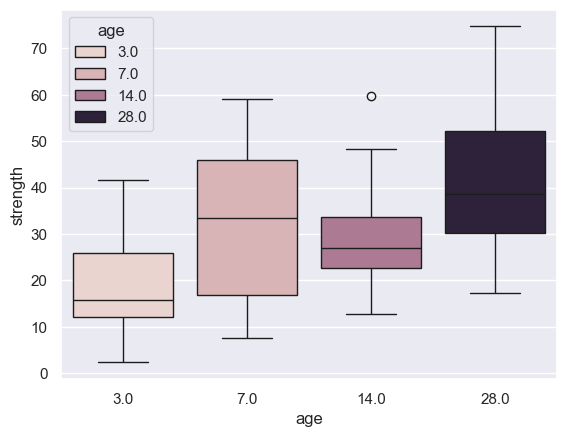

In [54]:
sns.boxplot(
    data=new_df,
    x="age",
    y="strength",
    hue="age",
)

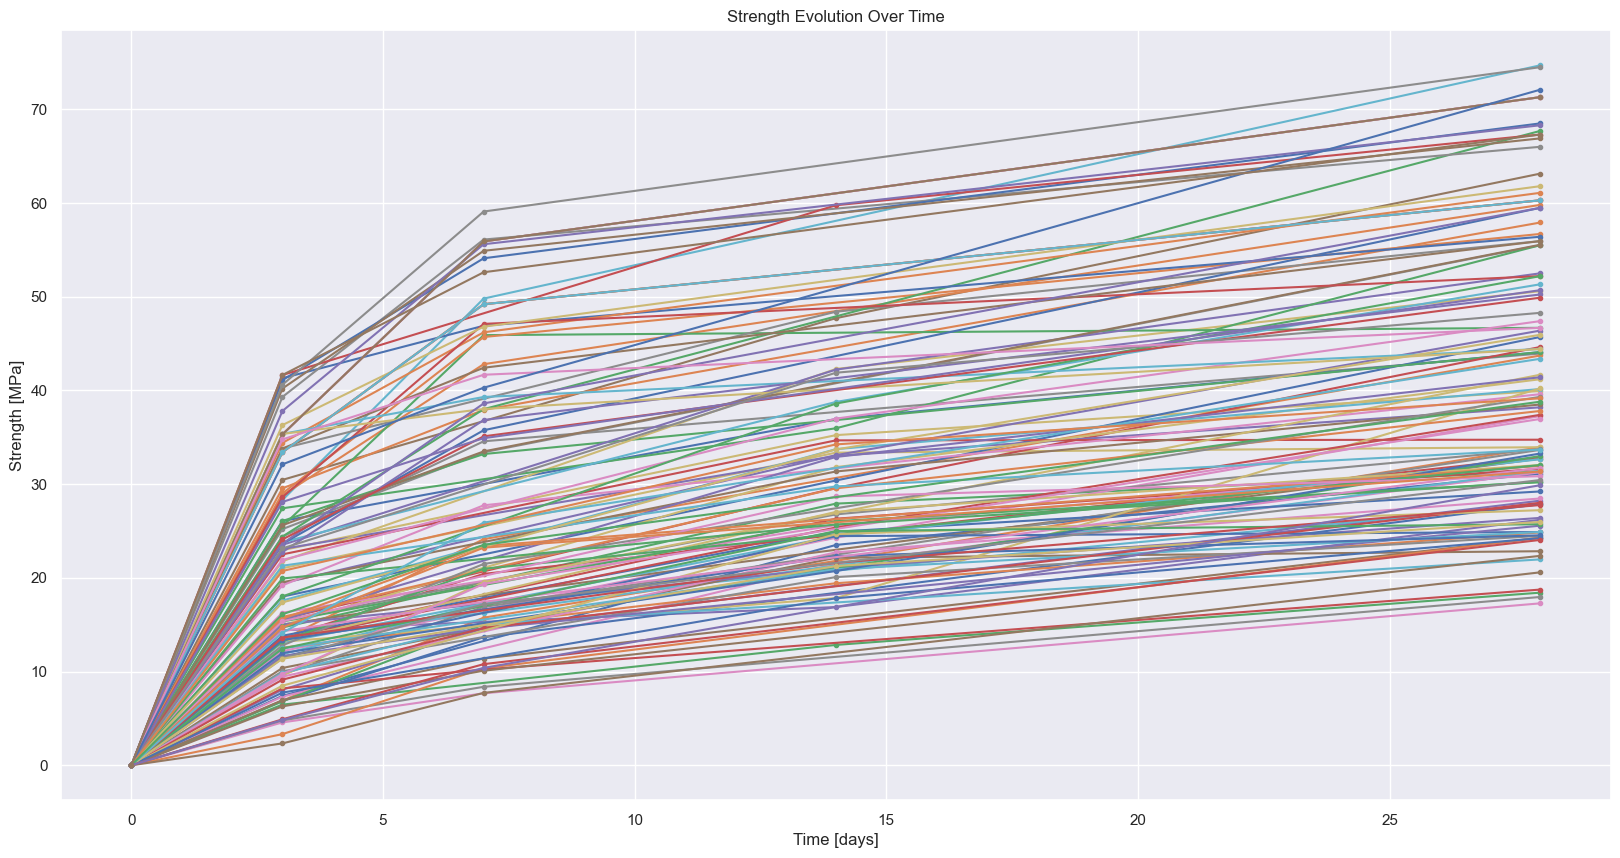

In [55]:
x_values = ['3d_age', 'mid_age', '28d_age']
y_values = ['3d_strength', 'mid_strength', '28d_strength']

plt.figure(figsize=(20, 10))

for index, row in df_ordered.iterrows():
    plt.plot([0] + [row[x_col] for x_col in x_values], [0] + [row[y_col] 
                            for y_col in y_values], marker='o', markersize=3, linestyle='-')

plt.xlabel('Time [days]')
plt.ylabel('Strength [MPa]')
plt.title('Strength Evolution Over Time')
plt.grid(True)

In [56]:
df_ordered

,cement,slag,ash,water,superplastic,coarseagg,fineagg,3d_age,3d_strength,mid_age,mid_strength,28d_age,28d_strength,binder,w/c
0,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,3.0,7.40,14.0,23.51,28.0,31.12,335.4,0.504
1,166.8,250.2,0.0,203.5,0.0,975.6,692.6,3.0,6.90,7.0,15.75,28.0,33.95,417.0,0.488
2,385.0,0.0,0.0,186.0,0.0,966.0,763.0,3.0,14.70,14.0,27.92,28.0,31.35,385.0,0.483
3,236.0,157.0,0.0,192.0,0.0,972.6,749.1,3.0,13.57,7.0,20.42,28.0,32.88,393.0,0.489
4,165.0,0.0,143.6,163.8,0.0,1005.6,900.9,3.0,14.40,14.0,16.88,28.0,26.20,308.6,0.531
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,178.0,129.8,118.6,179.9,3.6,1007.3,746.8,3.0,20.73,14.0,34.24,28.0,39.16,426.4,0.430
122,288.0,192.0,0.0,192.0,0.0,932.0,717.8,3.0,16.11,7.0,23.52,28.0,38.80,480.0,0.400
123,183.9,122.6,0.0,203.5,0.0,959.2,800.0,3.0,4.90,7.0,10.79,28.0,24.05,306.5,0.664
124,141.3,212.0,0.0,203.5,0.0,971.8,748.5,3.0,4.83,7.0,10.39,28.0,29.89,353.3,0.576


df_ordered["3d/7d"] = df_ordered["3d_strength"] / df_ordered["mid_strength"]
df_ordered.loc[df_ordered["mid_age"] == 14, "3d/7d"] = None

df_ordered["3d/14d"] = df_ordered["3d_strength"] / df_ordered["mid_strength"]
df_ordered.loc[df_ordered["mid_age"] == 7, "3d/14d"] = None

print(df_ordered)

In [57]:
df_ordered["3d/mid"] = df_ordered["3d_strength"] / df_ordered["mid_strength"]
df_ordered["mid/28d"] = df_ordered["mid_strength"] / df_ordered["28d_strength"]
df_ordered["3d/28d"] = df_ordered["3d_strength"] / df_ordered["28d_strength"]

Text(0.5, 1.0, 'middle age / 28-day age strength')

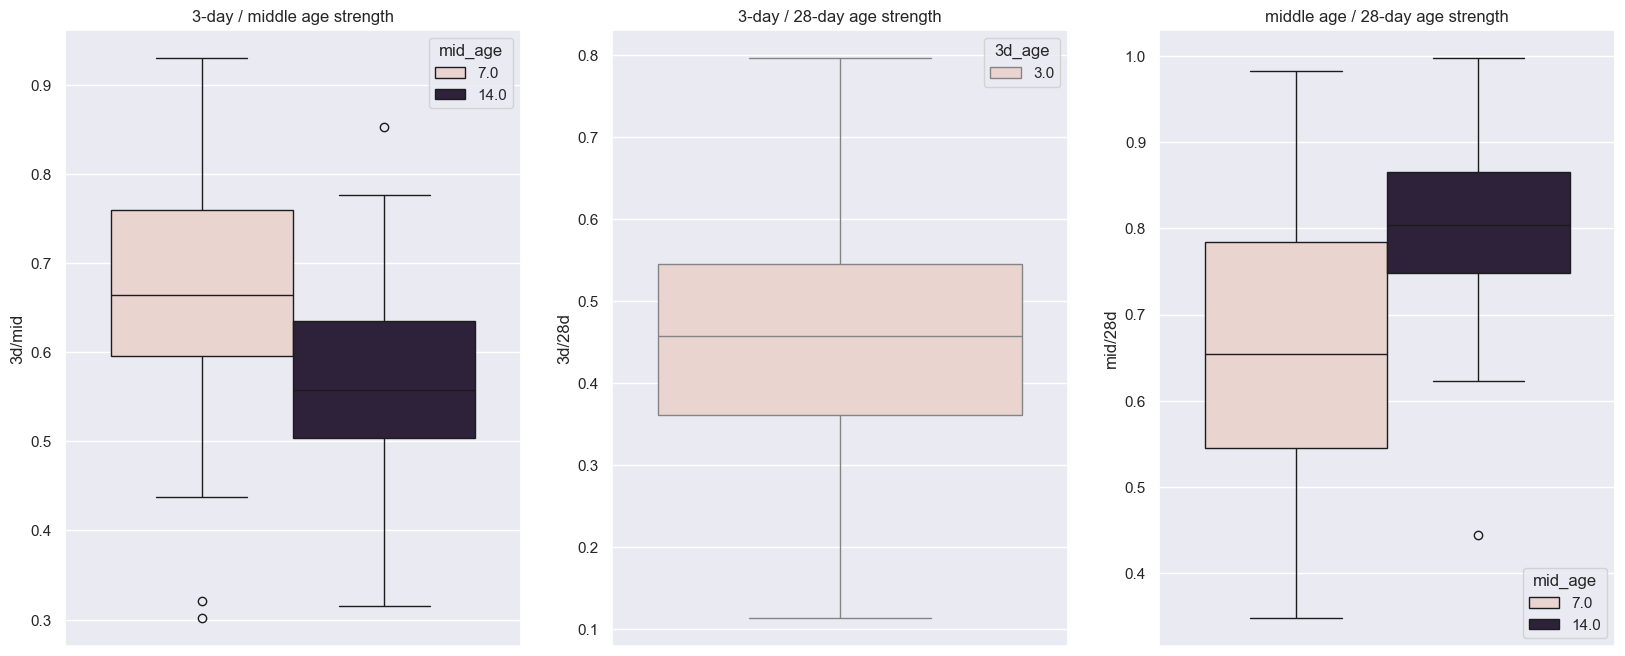

In [58]:
fig, axs = plt.subplots(1, 3, figsize=(20, 8))

sns.boxplot(
    data=df_ordered,
    y="3d/mid",
    hue="mid_age",
    ax=axs[0],
)
axs[0].set_title('3-day / middle age strength')

sns.boxplot(
    data=df_ordered,
    y="3d/28d",
    hue="3d_age",
    ax=axs[1],
)
axs[1].set_title('3-day / 28-day age strength')

sns.boxplot(
    data=df_ordered,
    y="mid/28d",
    hue="mid_age",
    ax=axs[2],
)
axs[2].set_title('middle age / 28-day age strength')

We can see that the distributions are wide, but let's make a try building a ML model from this dataframe.

# Building another model

* when we know the 3-day and 14-day strengts

In [59]:
# We drop the additional columns, which could cheat the model
X = df_ordered.drop(["3d/28d", "mid/28d", "3d/mid", "3d_age", "mid_age", "28d_age", "28d_strength"], axis=1)
y = df_ordered['28d_strength']

In [60]:
feature_train, feature_test, target_train, target_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [61]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(feature_train, target_train)
y_pred = model.predict(feature_test)

## Cross-validation score

In [62]:
cvs = cross_val_score(model, X, y, cv=5)
cvs

array([0.80755658, 0.89117319, 0.88642538, 0.92545752, 0.88416663])

## Mean squared error

In [63]:
mse = mean_squared_error(target_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 12.941947222692306


## R-Squared Score

In [64]:
r2 = r2_score(target_test, y_pred)
print('R-squared:', r2)

R-squared: 0.9411683307340205


## Mean Absolute Percentage Error

In [65]:
mape = mean_absolute_percentage_error(target_test, y_pred)
print('Mean Absolute Percentage Error:', mape)

Mean Absolute Percentage Error: 0.07233372331995992


## Shapley calculations

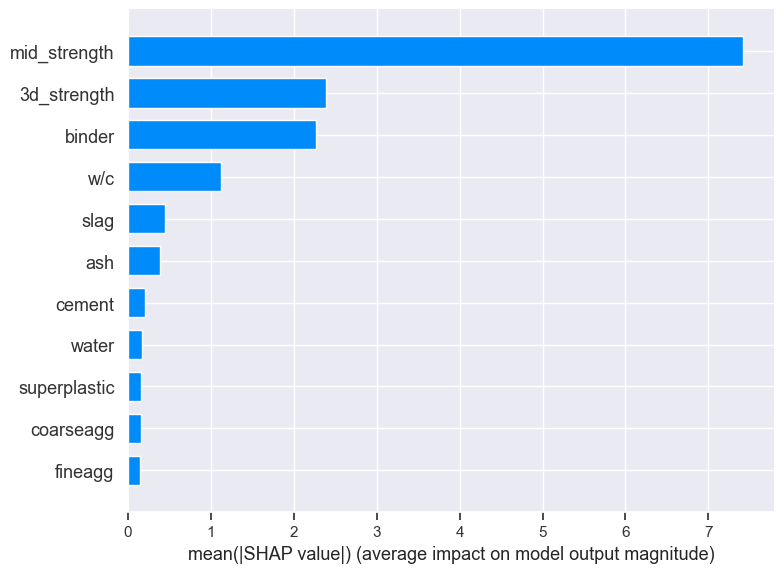

In [66]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(feature_test)
shap.summary_plot(shap_values, feature_test, plot_type="bar")

In [67]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0], feature_test.iloc[0])

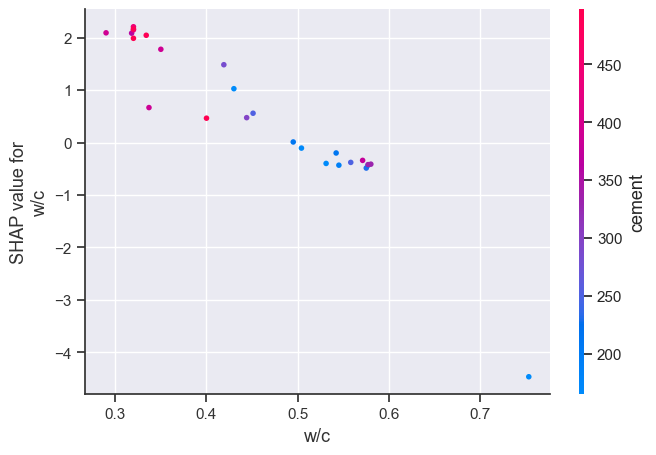

In [68]:
shap.dependence_plot("w/c", shap_values, feature_test)

## Checking the model when we know only the 3-day age of the mixture

In [69]:
# We drop the "mid_strength" column as well
X = df_ordered.drop(["3d/28d", "mid/28d", "3d/mid", "3d_age", "mid_age", "28d_age", "mid_strength", "28d_strength"], axis=1)
y = df_ordered['28d_strength']

feature_train, feature_test, target_train, target_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(feature_train, target_train)
y_pred = model.predict(feature_test)

cvs = cross_val_score(model, X, y, cv=5)

mse = mean_squared_error(target_test, y_pred)

r2 = r2_score(target_test, y_pred)

mape = mean_absolute_percentage_error(target_test, y_pred)

print(f"Cross-validation score:\n{cvs}\n")
print(f"Mean squared error:\n{mse}\n")
print(f"R-Squared score:\n{r2}\n")
print(f"Mean Absolute Percentage Error:\n{mape}")

Cross-validation score:
[0.78221446 0.86797954 0.85432778 0.89655313 0.81979194]

Mean squared error:
15.10522413346156

R-Squared score:
0.9313344788757814

Mean Absolute Percentage Error:
0.07907565076082729


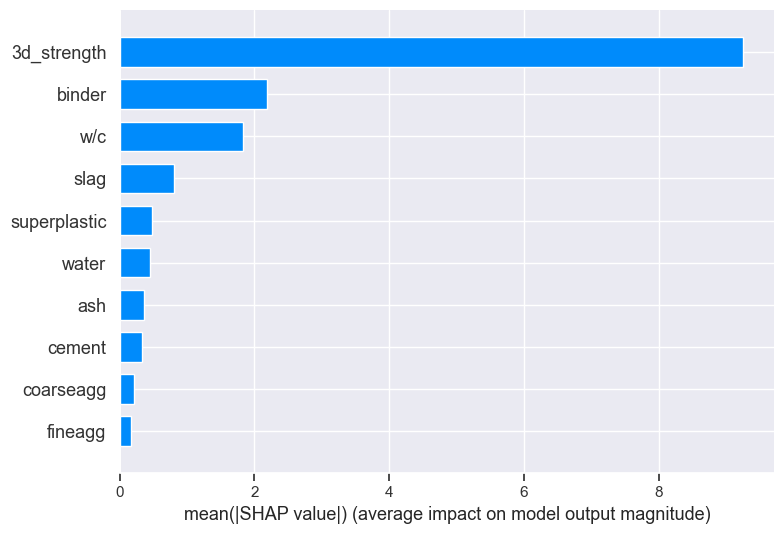

In [70]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(feature_test)
shap.summary_plot(shap_values, feature_test, plot_type="bar")

In [71]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0], feature_test.iloc[0])

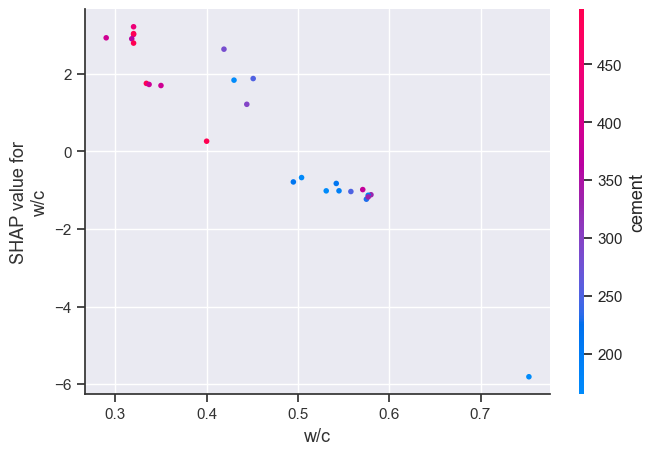

In [72]:
shap.dependence_plot("w/c", shap_values, feature_test)

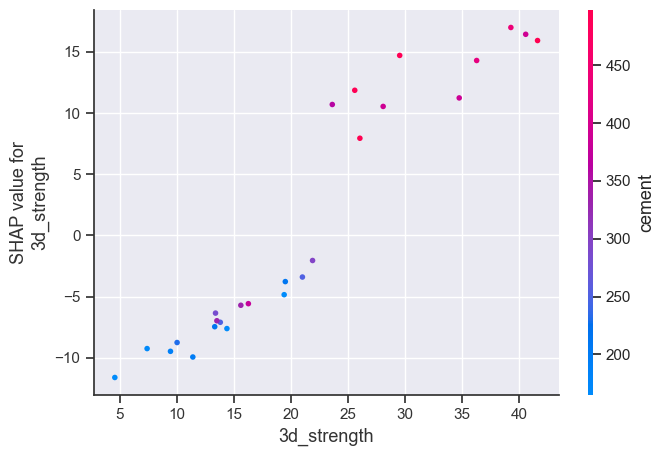

In [73]:
shap.dependence_plot("3d_strength", shap_values, feature_test)